In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
#since CNN can process 2D data, we will not convert this to 1D data
from tensorflow.keras import backend as K

# we need to shape the data differently than before. Since we are treating the data as a 2D image of 28X28 pixels we can shape it as 1*28*28 or 28*28*1 
#here 1 being the greyscale, if it was color it would have been 3 (Red, Green, Blue)

if K.image_data_format() == 'channels_first':
    train = train_images.reshape(train_images.shape[0],1,28,28)
    test = test_images.reshape(test_images.shape[0],1,28,28)
    input_shape = (1,28,28)
else:
    train = train_images.reshape(train_images.shape[0],28,28,1)
    test = test_images.reshape(test_images.shape[0],28,28,1)
    input_shape = (28,28,1)

train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255
print(input_shape)
    





(28, 28, 1)


In [4]:
#converting the label data into one hot format
trainL =  tensorflow.keras.utils.to_categorical(train_labels,10)
testL = tensorflow.keras.utils.to_categorical(test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


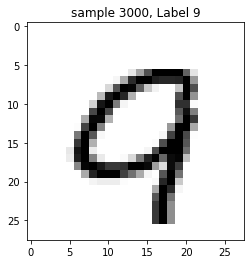

In [5]:
#printing out a random trainign sample
import matplotlib.pyplot as plt
def display_sample(num):
    print(trainL[num]) #one hot array format
    label = trainL[num].argmax(axis=0)
    image = train[num].reshape(28,28)
    plt.title('sample %d, Label %d'%(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(3000)

In [6]:
#set up a sequential model and  conv2D layer
model = Sequential()
#now we steup a CNN, it takes 32 windows each of size 3X3 , followed by second convolution with 64 windows each of size 3X3
model.add(Conv2D(32, kernel_size=(3,3),activation = 'relu', input_shape=input_shape))
#64 3X3 kernels
model.add(Conv2D(64,(3,3),activation='relu'))
#reduce by maxpooling, shrinking data to something more manageable; pool size can be different from the kernel size
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout to avoid overfitting
model.add(Dropout(0.25))
#flatten the results into one D to pass into the final layers
model.add(Flatten())
### now it is just like any multilayer perceptron where we feed the flat layer
model.add(Dense(128, activation='relu'))
#another dropout
model.add(Dropout(0.4))
#Final categorization from 0.9 with softmax
model.add(Dense(10,activation='relu'))







In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#WARNING !!!
# this can take hours to run and your computer's CPU may max out
history = model.fit(train, trainL, batch_size=32, epochs=10, verbose=2, validation_data =(test,testL))

ValueError: Error when checking input: expected conv2d_input to have shape (28, 28, 1) but got array with shape (1, 28, 28)

In [ ]:
score = model.evaluate(test,testL,verbose=0)
print('Test loss:'%score[0])
print('Test accuracy',%score[1])